# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the input data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Data augmentation layers specifically tuned for CIFAR-10
data_augmentation = Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomTranslation(0.1, 0.1),
])
# Define the model
model = Sequential([
    Input(shape=(32, 32, 3)),
    data_augmentation,

    # First Convolutional Block
    Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    # Second Convolutional Block
    Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),


    # Dense layers
    Flatten(),
    Dense(100, kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])



*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         204,900 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 235,462 (919.77 KB)

 Trainable params: 235,006 (917.99 KB)

 Non-trainable params: 456 (1.78 KB)

In [37]:
history = model.fit(X_train, y_train,
                    batch_size=512, # Corrected indentation
                    epochs=50) # Corrected indentation

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.1429 - loss: 2.8154
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.2448 - loss: 2.3223
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.2834 - loss: 2.1686
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.3107 - loss: 2.0637
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.3270 - loss: 2.0092
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.3389 - loss: 1.9603
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.3498 - loss: 1.9312
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.3598 - loss: 1.8905
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.3702 - loss: 1.8651
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.3780 - loss: 1.8383
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.3833 - loss: 1.8188
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - ac

*   Plot the cross entropy loss curve and the accuracy curve

KeyError: 'val_accuracy'

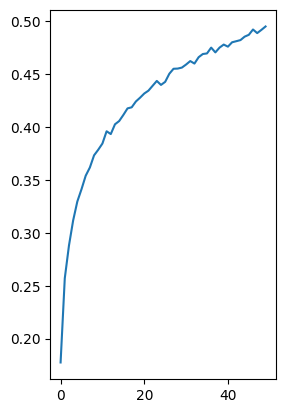

In [44]:
# Import the necessary library
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [45]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the VGG-inspired model
def create_vgg_inspired_model():
    model = models.Sequential([
        # First stack of two convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Second stack of two convolutional layers
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Flatten layer
        layers.Flatten(),

        # Dense layer
        layers.Dense(128, activation='relu'),

        # Output layer
        layers.Dense(10, activation='softmax')
    ])
    return model

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [46]:
# Create and compile the model
model = create_vgg_inspired_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=50,
                    validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.2791 - loss: 1.9633 - val_accuracy: 0.4995 - val_loss: 1.4099
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5134 - loss: 1.3610 - val_accuracy: 0.5739 - val_loss: 1.2108
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5883 - loss: 1.1671 - val_accuracy: 0.6192 - val_loss: 1.0968
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.6389 - loss: 1.0372 - val_accuracy: 0.6517 - val_loss: 1.0046
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6759 - loss: 0.9352 - val_accuracy: 0.6757 - val_loss: 0.9303
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7052 - loss: 0.8511 - val_accuracy: 0.6847 - val_loss: 0.9162
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.7300 - loss: 0.7836 - val_accuracy: 0.7029 - val_loss: 0.8681
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7414 - loss: 0.7504 - val_accuracy: 0.7039 - 

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


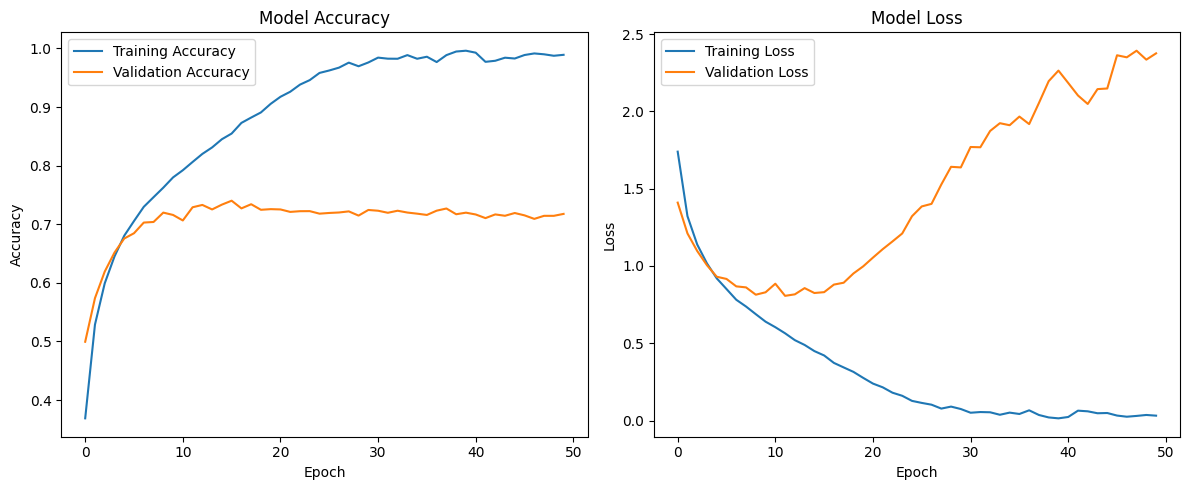

Test accuracy: 0.7177


In [48]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.3038 - loss: 1.9117 - val_accuracy: 0.4891 - val_loss: 1.4185
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5092 - loss: 1.3677 - val_accuracy: 0.5728 - val_loss: 1.2045
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5935 - loss: 1.1626 - val_accuracy: 0.6242 - val_loss: 1.0750
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6454 - loss: 1.0124 - val_accuracy: 0.6497 - val_loss: 1.0070
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6830 - loss: 0.9122 - val_accuracy: 0.6779 - val_loss: 0.9309
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7178 - loss: 0.8221 - val_accuracy: 0.6977 - val_loss: 0.8792
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.7375 - loss: 0.7593 - val_accuracy: 0.6947 - val_loss: 0.8727
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7617 - loss: 0.6966 - val_accuracy: 0.7160 - 

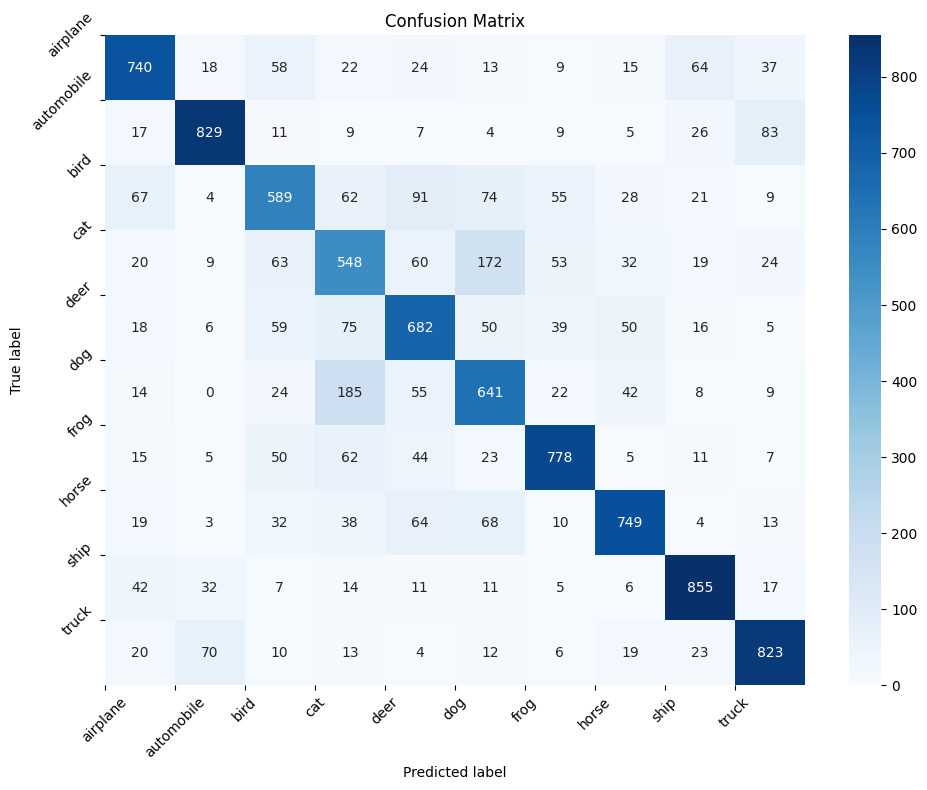

Class Confusion Analysis:
58 instances of airplane were misclassified as bird
64 instances of airplane were misclassified as ship
83 instances of automobile were misclassified as truck
67 instances of bird were misclassified as airplane
62 instances of bird were misclassified as cat
91 instances of bird were misclassified as deer
74 instances of bird were misclassified as dog
55 instances of bird were misclassified as frog
63 instances of cat were misclassified as bird
60 instances of cat were misclassified as deer
172 instances of cat were misclassified as dog
53 instances of cat were misclassified as frog
59 instances of deer were misclassified as bird
75 instances of deer were misclassified as cat
185 instances of dog were misclassified as cat
55 instances of dog were misclassified as deer
62 instances of frog were misclassified as cat
64 instances of horse were misclassified as deer
68 instances of horse were misclassified as dog
70 instances of truck were misclassified as automobi

In [52]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load and preprocess CIFAR-10 data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode labels
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# Define the VGG-inspired model (same as before)
def create_vgg_inspired_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create and compile the model
model = create_vgg_inspired_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (assuming it's not already trained)
history = model.fit(X_train, y_train_one_hot,
                    batch_size=512,
                    epochs=50,
                    validation_data=(X_test, y_test_one_hot))

# Use predict function on the test split
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test.flatten()

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Set tick labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names, rotation=45)

plt.tight_layout()
plt.show()

# Analyze class confusions
print("Class Confusion Analysis:")
for i in range(10):
    for j in range(10):
        if i != j and cm[i][j] > 50:  # arbitrary threshold
            print(f"{cm[i][j]} instances of {class_names[i]} were misclassified as {class_names[j]}")



**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [ ]:
# Calculate and print overall accuracy
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print(f"\nOverall Accuracy: {accuracy:.4f}")

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [53]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Resize images to 64x64
X_train = tf.image.resize(X_train, (64, 64)).numpy()
X_test = tf.image.resize(X_test, (64, 64)).numpy()

# Normalize pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def create_vgg_model():
    model = models.Sequential([
        # First block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Second block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Third block
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Flatten layer
        layers.Flatten(),

        # Dense layers
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model



*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 111s 809ms/step - accuracy: 0.1454 - loss: 2.2545 - val_accuracy: 0.2899 - val_loss: 1.9814
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 362ms/step - accuracy: 0.3507 - loss: 1.8254 - val_accuracy: 0.4535 - val_loss: 1.5552
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 364ms/step - accuracy: 0.4670 - loss: 1.4930 - val_accuracy: 0.5115 - val_loss: 1.3817
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 364ms/step - accuracy: 0.5294 - loss: 1.3262 - val_accuracy: 0.5509 - val_loss: 1.2838
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 370ms/step - accuracy: 0.5777 - loss: 1.1972 - val_accuracy: 0.5788 - val_loss: 1.1795
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 371ms/step - accuracy: 0.6159 - loss: 1.0921 - val_accuracy: 0.6126 - val_loss: 1.0989
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 371ms/step - accuracy: 0.6571 - loss: 0.9763 - val_accuracy: 0.6312 - val_loss: 1.0490
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 364ms/step - accuracy: 0.6927 - loss: 0.8782 - val_acc

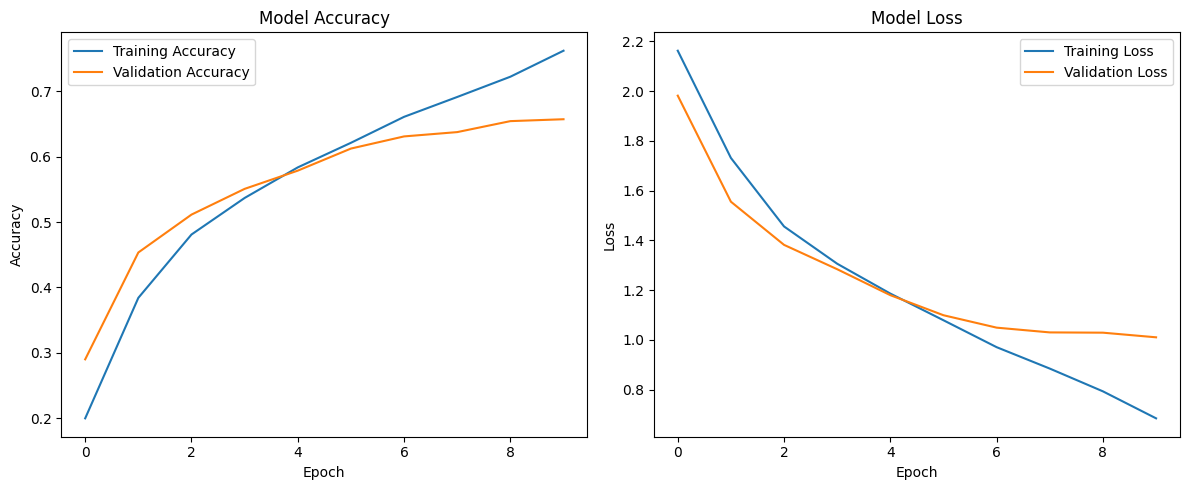

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step


ValueError: Found input variables with inconsistent numbers of samples: [100000, 10000]

In [54]:
# Create and compile the model
model = create_vgg_model()
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train_one_hot,
                    batch_size=512,
                    epochs=10,
                    validation_data=(X_test, y_test_one_hot))

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

# Predict the output for the test split
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test.flatten()

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Set tick labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names, rotation=45)

plt.tight_layout()
plt.show()

# Analyze class confusions
print("Class Confusion Analysis:")
for i in range(10):
    for j in range(10):
        if i != j and cm[i][j] > 50:  # arbitrary threshold
            print(f"{cm[i][j]} instances of {class_names[i]} were misclassified as {class_names[j]}")

# Calculate and print overall accuracy
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print(f"\nOverall Accuracy: {accuracy:.4f}")


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns. They determine whether a neuron should be activated based on its input. Key uses include:

Transforming weighted sums into bounded outputs
Enabling networks to approximate non-linear functions
Facilitating gradient flow during backpropagation
Allowing for multi-class classification (e.g., softmax)
Mitigating the vanishing gradient problem (e.g., ReLU)

2 - Key Differences between sigmoid and softmax:

Output range:
Sigmoid: (0, 1) for each neuron independently
Softmax: (0, 1) for each neuron, but sums to 1 across all neurons
Use case:
Sigmoid: Binary classification or multi-label classification
Softmax: Multi-class, mutually exclusive classification
Interpretation:
Sigmoid: Independent probability for each class
Softmax: Probability distribution over all classes
Number of neurons:
Sigmoid: Can be used on any number of neurons
Softmax: Typically used on the final layer with neurons equal to the number of classes

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
Use case:
Binary crossentropy: Binary classification problems
Categorical crossentropy: Multi-class classification problems
Number of classes:
Binary crossentropy: Two classes (0 or 1)
Categorical crossentropy: Two or more classes
Label encoding:
Binary crossentropy: Uses single binary value
Categorical crossentropy: Uses one-hot encoded vectors
Formula:
Binary crossentropy: -Σ(y log(p) + (1-y) log(1-p))
Categorical crossentropy: -Σ(y log(p))
Output layer activation:
Binary crossentropy: Typically used with sigmoid activation
Categorical crossentropy: Typically used with softmax activation


_
